In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from ancestrator import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# $F_{ST}$ Latinos (between populations) & LEA (between regions)

In [102]:
from itertools import product

datasets = [Dataset("1000Genomes", label)
            for label in ['L', 'LE', 'LEA', 'LEAC', 'LEACI']]

panel_labels = ["GAL_Completo", "GAL_Affy",
                "CPx1", "CPx10", "CPx100",
                "100_SNPs_from_GAL_Affy", "50_SNPs_from_GAL_Affy",
                "25_SNPs_from_GAL_Affy", "20_SNPs_from_GAL_Affy",
                "15_SNPs_from_GAL_Affy"]

frames = []
for panel_label, dataset in product(panel_labels, datasets):
    dataset.set_panel(panel_label)
    if dataset.label == 'L':
        df = dataset.run_fst('population')
        df['level'] = 'population'
    else:
        df = dataset.run_fst('region')
        df['level'] = 'region'
    df['dataset'] = dataset.label
    df['panel'] = panel_label
    frames.append(df)

mean_fst = pd.concat(frames).groupby(['level', 'dataset', 'panel']).mean().unstack('panel')['Fst']
sort_panels = ["CPx1", "CPx10", "CPx100", "GAL_Completo", "GAL_Affy",
               "100_SNPs_from_GAL_Affy", "50_SNPs_from_GAL_Affy",
               "25_SNPs_from_GAL_Affy", "20_SNPs_from_GAL_Affy",
               "15_SNPs_from_GAL_Affy"]
mean_fst = mean_fst[sort_panels]
mean_fst.columns = [Panel(panel_label).name for panel_label in mean_fst.columns]
mean_fst

CPx1 · 438 SNPs  CPx10 · 4,424 SNPs  CPx100 · 43,144 SNPs  \
level      dataset                                                              
population L               0.018299            0.018825              0.018854   
region     LE              0.017955            0.018871              0.018389   
           LEA             0.068920            0.066504              0.065758   
           LEAC            0.079672            0.075545              0.074351   
           LEACI           0.074791            0.071325              0.070097   

                    GAL_Completo · 445 SNPs  GAL_Affy · 179 SNPs  \
level      dataset                                                 
population L                       0.104449             0.099087   
region     LE                      0.121449             0.110167   
           LEA                     0.348847             0.386319   
           LEAC                    0.315325             0.347403   
           LEACI                   0.290450             0.322094   

                    GAL_Affy · SubPanel_100  GAL_Affy · SubPanel_50  \
level      dataset                                                    
population L                       0.092496                0.071592   
region     LE                      0.066356                0.053685   
           LEA                     0.451967                0.532849   
           LEAC                    0.410760                0.483638   
           LEACI                   0.382093                0.450315   

                    GAL_Affy · SubPanel_25  GAL_Affy · SubPanel_20  \
level      dataset                                                   
population L                      0.088894                0.093338   
region     LE                     0.075780                0.082116   
           LEA                    0.518940                0.507876   
           LEAC                   0.471756                0.463890   
           LEACI                  0.439977                0.434481   

                    GAL_Affy · SubPanel_15  
level      dataset                          
population L                      0.076157  
region     LE                     0.066855  
           LEA                    0.546644  
           LEAC                   0.479910  
           LEACI                  0.447036

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__all


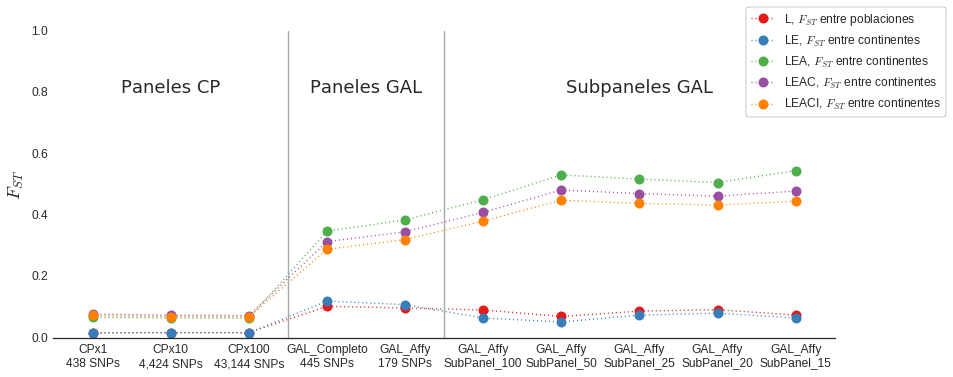

In [100]:
import numpy as np
from os.path import expanduser, join


fdir = expanduser("~/tesina/charts/panel_analyses")

sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns.set_style("white")


df = mean_fst.copy()

color = sns.color_palette("Set1", 5)
ax = df.T.plot(figsize=(14, 5.5), rot=0, color=color, linestyle="dotted",
               marker="o", markersize=10) #, width=0.8) # kind="bar", 
ax.set_ylabel("$F_{ST}$", fontsize=18, fontweight="bold")
ax.legend(fancybox=True, loc="best", bbox_to_anchor=(1.01, .75),
          title="Datasets")

# Annotate groups of panels
ax.axvline(2.5, color="darkgray")
ax.axvline(4.5, color="darkgray")
text_yloc = 0.8
texts = [(1, text_yloc, "Paneles CP"),
         (3.5, text_yloc, "Paneles GAL"),
         (7, text_yloc, "Subpaneles GAL")]
for params in texts:
    ax.text(*params, fontsize=18, horizontalalignment="center",
            family="monospace", fontname="Courier")

ax.set_ylim([0, 1])
ygrid_points = np.linspace(0, 1, 6)
ax.set_yticks(ygrid_points)

ax.set_xlim([-0.5, 9.5])
ax.set_xticks(np.linspace(0, 9, 10))

ax.set_xticklabels(xticklabels, rotation=0)
sns.despine(left=True)
ax.xaxis.grid(False)

# Remake legend labels
handles, labels = ax.get_legend_handles_labels()
trans = {"population": "poblaciones", "region": "continentes"}

new_labels = []
for label in labels:
    level, dataset = label.split(', ')
    level = level.replace('(', '')
    dataset = dataset.replace(')', '')
    new_labels.append('{}, $F_{{ST}}$ entre {}'.format(dataset, trans[level]))
    
ax.legend(handles, new_labels, bbox_to_anchor=(1.15, 1.1),
          frameon=True, fancybox=True)

caption = "Fst promedio (todos los datasets)"
filepath = join(fdir, "fst_barchart__all")
plt.savefig(filepath, bbox_inches="tight")
print(caption)
print(filepath)
plt.show()

In [55]:
df = mean_fst.loc['population'].T.applymap(lambda x: round(x, 3))
print(df)
print()
print(df.to_latex())

dataset                      L
CPx1 · 438 SNPs          0.018
CPx10 · 4,424 SNPs       0.019
CPx100 · 43,144 SNPs     0.019
GAL_Completo · 445 SNPs  0.104
GAL_Affy · 179 SNPs      0.099
GAL_Affy · SubPanel_100  0.092
GAL_Affy · SubPanel_50   0.072
GAL_Affy · SubPanel_25   0.089
GAL_Affy · SubPanel_20   0.093
GAL_Affy · SubPanel_15   0.076

\begin{tabular}{lr}
\toprule
dataset &      L \\
\midrule
CPx1 · 438 SNPs         &  0.018 \\
CPx10 · 4,424 SNPs      &  0.019 \\
CPx100 · 43,144 SNPs    &  0.019 \\
GAL\_Completo · 445 SNPs &  0.104 \\
GAL\_Affy · 179 SNPs     &  0.099 \\
GAL\_Affy · SubPanel\_100 &  0.092 \\
GAL\_Affy · SubPanel\_50  &  0.072 \\
GAL\_Affy · SubPanel\_25  &  0.089 \\
GAL\_Affy · SubPanel\_20  &  0.093 \\
GAL\_Affy · SubPanel\_15  &  0.076 \\
\bottomrule
\end{tabular}

